In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import stats

In [ ]:
df_train=pd.read_csv("/content/train (1).csv")

In [ ]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### since null values are there using **mean** in the **item_weight** columns
# also using **mode** in the **outlet_size** columns


In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [ ]:
df_train["Item_Fat_Content"]=df_train["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [ ]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## NOW CONVERTING ALL CATEGORICAL COLUMNS INTO NUMERICAL USING ***LABEL ENCODER ***

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df_train["Item_Fat_Content"]=le.fit_transform(df_train["Item_Fat_Content"])
df_train["Item_Type"]=le.fit_transform(df_train["Item_Type"])
df_train["Outlet_Size"]=le.fit_transform(df_train["Outlet_Size"])
df_train["Outlet_Location_Type"]=le.fit_transform(df_train["Outlet_Location_Type"])
df_train["Outlet_Type"]=le.fit_transform(df_train["Outlet_Type"])
df_train["Outlet_Identifier"]=le.fit_transform(df_train["Outlet_Identifier"])
df_train["Item_Identifier"]=le.fit_transform(df_train["Item_Identifier"])

In [ ]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<ipython-input-116-caba037f07b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["Item_Outlet_Sales"])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

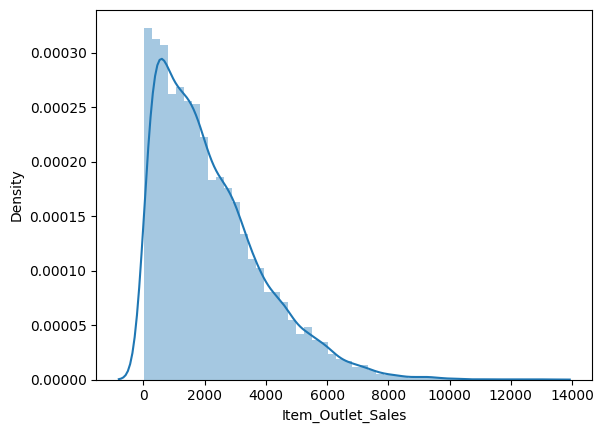

In [ ]:
sns.distplot(df_train["Item_Outlet_Sales"])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df_train.drop("Item_Outlet_Sales",axis=1)
y=df_train["Item_Outlet_Sales"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()

In [ ]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.5204160409999412

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)
rf_pred=model_rf.predict(x_test)
r2_score(y_test,rf_pred)

0.5625736137993025

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
r2_score(y_test,y_pred_gb)

0.6046658924705948

#**METHOD** -**2**



1. INSTEAD OF USING MEAN USING RANDOM VARIABLE SAMPLE FROM THE DATASET ITSELF   
2.  INSTEAD OF USING LABEL ENCODER USING TARGET GUIDED ORDINAL ENCODING



# REASON FOR USAGE OF THESE  METHOD


1.   IN MEAN-VARIENCE WILL BE HIGH
2.   IN LABEL ENCODER -IT CREATE ORDINAL RANKING EVEN THOUGH THEY DONT HAVE ORDINAL RELATIONSHIP
source:[link text](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)



In [ ]:
df=pd.read_csv("/content/train (1).csv")

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## REPLACING NULL VALUES WITH RANDOM SAMPLING TECHNIQUE

In [ ]:
mean=df["Item_Weight"].mean()

In [ ]:
def impute_weight(df,variable,mean):
  df[variable+"_mean"]=df[variable].fillna(mean)


In [ ]:
impute_weight(df,"Item_Weight",mean)

In [ ]:
def impute_nan(df,variable,random_state):
  df[variable+"_random"]=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=random_state)
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [ ]:
impute_nan(df,"Item_Weight",0)

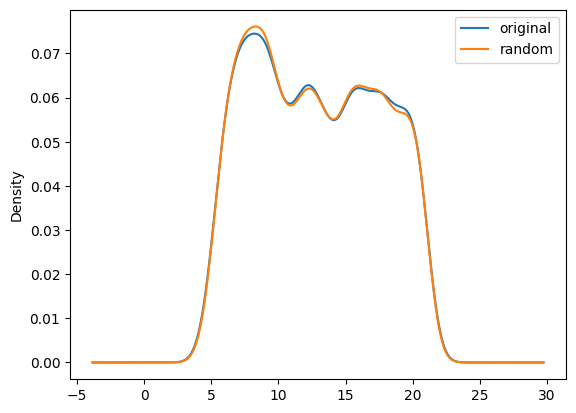

In [ ]:
plt=df["Item_Weight"].plot(kind="kde")
df["Item_Weight_random"].plot(kind="kde",ax=plt)
plt.legend(["original","random"])

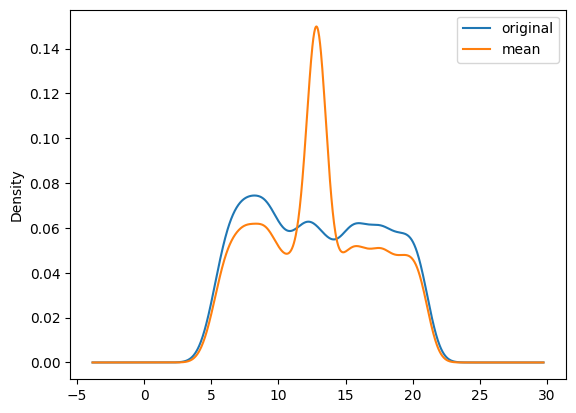

In [ ]:
plt=df["Item_Weight"].plot(kind="kde")
df["Item_Weight_mean"].plot(kind="kde",ax=plt)
plt.legend(["original","mean"])

### AS YOU CAN SEE IN THIS IMAGE THERE IS A MAJOR CHANGE IN VARIANCE,WHILE WE ARE USING MEAN AS REPLACE OPTION COMPARED TO RANDOM

In [ ]:
import scipy.stats as stats

<ipython-input-144-27be76893302>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Item_Outlet_Sales"])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

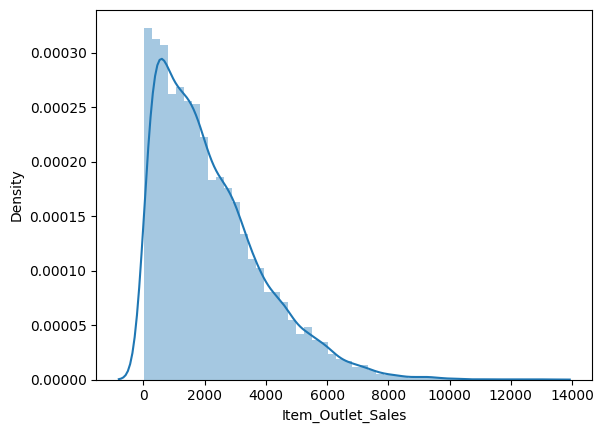

In [ ]:
sns.distplot(df["Item_Outlet_Sales"])

### AS YOU CAN SEE THIS DISTRIBUTION IS RIGHT SKEWED WE ARE USING BOXCOX TRANSFORMATION IN ORDER TO MAKE NORMAL GAUSSAIN DISRTIBUTION

In [ ]:
df["Item_Outlet_Sales_boxcox"], _ = stats.boxcox(df['Item_Outlet_Sales'])

<ipython-input-146-fe8b3cc788fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Item_Outlet_Sales_boxcox"])


<Axes: xlabel='Item_Outlet_Sales_boxcox', ylabel='Density'>

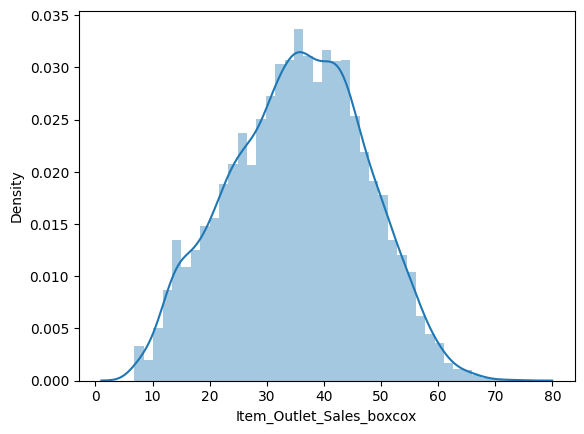

In [ ]:
sns.distplot(df["Item_Outlet_Sales_boxcox"])


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_random,Item_Outlet_Sales_boxcox
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,47.007885
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,20.958294
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,37.964893
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,25.485930
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,28.660858


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_mean                0
Item_Weight_random              0
Item_Outlet_Sales_boxcox        0
dtype: int64

In [ ]:
df.drop(columns=["Item_Weight","Item_Weight_mean"],inplace=True)

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_random              0
Item_Outlet_Sales_boxcox        0
dtype: int64

In [ ]:
df["Outlet_Size"]=df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])

In [ ]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [ ]:
df2=df.copy()

**CONVERTING ALL CATEGORICAL COLUMNS INTO ORDINAL COLUMNS BASED ON TARGET-ORDINAL ENCODING **

*   
###* MAKING ORDINALS BASED ON ITEM OULTET SALES FOR EACH CATEGORY *



In [ ]:
df2["new"]=df2["Item_Identifier"].astype(str).str[0:3]
df2.groupby(["new"])["Item_Outlet_Sales"].mean().sort_values(ascending=False)
labels=df2.groupby(["new"])["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labels2={k:i for i,k in enumerate(labels,0)}
df2["int_ranks"]=df2["new"].map(labels2)

In [ ]:
df2.groupby(["Item_Type"])["Item_Outlet_Sales"].mean().sort_values(ascending=False)
labels_3=df2.groupby(["Item_Type"])["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labels_32={k:i for i,k in enumerate(labels_3,0)}
df2["item_type_ranks"]=df2["Item_Type"].map(labels_32)

In [ ]:
df2.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].mean().sort_values(ascending=False)
labels4=df2.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labwels4={k:i for i,k in enumerate(labels4,0)}
df2["outlet_id_ranks"]=df2["Outlet_Identifier"].map(labwels4)

In [ ]:
df2.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
label6=df2.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labwels6={k:i for i,k in enumerate(label6,0)}
df2["out_type_ranks6"]=df2["Outlet_Type"].map(labwels6)

In [ ]:
df2.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
label7=df2.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labwels7={k:i for i,k in enumerate(label7,0)}
df2["fat_content_ranks"]=df2["Item_Fat_Content"].map(labwels7)

In [ ]:
df2.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
labels5=df2.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labwels5={k:i for i,k in enumerate(labels5,0)}
df2["loc_type_ranks"]=df2["Outlet_Location_Type"].map(labwels5)

In [ ]:
df2.groupby(df2["Outlet_Size"])["Item_Outlet_Sales"].mean().sort_values(ascending=False)
label8=df2.groupby(df2["Outlet_Size"])["Item_Outlet_Sales"].mean().sort_values(ascending=False).index
labwels8={k:i for i,k in enumerate(label8,0)}
df2["out_size_ranks"]=df2["Outlet_Size"].map(labwels8)

In [ ]:
df2.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Weight_random,Item_Outlet_Sales_boxcox,new,int_ranks,item_type_ranks,outlet_id_ranks,out_type_ranks6,fat_content_ranks,loc_type_ranks,out_size_ranks
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,9.30,47.007885,FDA,18,5,2,1,1,2,1
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,5.92,20.958294,DRC,49,13,7,2,0,1,1
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,17.50,37.964893,FDN,14,8,2,1,1,2,1
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,...,19.20,25.485930,FDX,23,2,9,3,0,1,1
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,8.93,28.660858,NCD,68,4,4,1,1,1,0


In [ ]:
df2.drop(columns=["new","Item_Type","Outlet_Identifier","Item_Fat_Content","Outlet_Location_Type","Outlet_Type","Outlet_Size"],inplace=True)

In [ ]:
df2.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_random,Item_Outlet_Sales_boxcox,int_ranks,item_type_ranks,outlet_id_ranks,out_type_ranks6,fat_content_ranks,loc_type_ranks,out_size_ranks
0,FDA15,0.016047,249.8092,1999,3735.1380,9.30,47.007885,18,5,2,1,1,2,1
1,DRC01,0.019278,48.2692,2009,443.4228,5.92,20.958294,49,13,7,2,0,1,1
2,FDN15,0.016760,141.6180,1999,2097.2700,17.50,37.964893,14,8,2,1,1,2,1
3,FDX07,0.000000,182.0950,1998,732.3800,19.20,25.485930,23,2,9,3,0,1,1
4,NCD19,0.000000,53.8614,1987,994.7052,8.93,28.660858,68,4,4,1,1,1,0


In [ ]:
df2.drop(columns=["Item_Identifier"],inplace=True)

In [ ]:
df2.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df2.drop("Item_Outlet_Sales_boxcox",axis=1)
y=df2["Item_Outlet_Sales_boxcox"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.6754647832355358

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
r2_score(y_test,rf_pred)


0.6846901272932688

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
r2_score(y_test,gb_pred)

0.7064384194630441

## BEFORE FEATURE SELECTION SCORE IS AROUND 60 FOR BOTH METHODS

In [ ]:
from sklearn.feature_selection import SelectKBest


In [ ]:
feature_selection=SelectKBest(k=5)
x_feature=feature_selection.fit_transform(x_train_scaled,y_train)

In [ ]:
model.fit(x_feature,y_train)

LinearRegression()

In [ ]:
x_feature_test=feature_selection.transform(x_test_scaled)

In [ ]:
y_pred=model.predict(x_feature_test)

In [ ]:
r2_score(y_test,y_pred)

0.655900623983225

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
from sklearn.feature_selection import SelectPercentile

In [ ]:
selector=SelectPercentile(mutual_info_regression,percentile=90)

In [ ]:
selected_x=selector.fit_transform(x_train_scaled,y_train)

In [ ]:
model.fit(selected_x,y_train)

LinearRegression()

In [ ]:
selected_x_test=selector.transform(x_test_scaled)

In [ ]:
y_pred=model.predict(selected_x_test)

In [ ]:
r2_score(y_test,y_pred)

0.6759453608159703

In [ ]:
gb_select=selector.fit_transform(x_train,y_train)

In [ ]:
gb.fit(gb_select,y_train)

GradientBoostingRegressor()

In [ ]:
gb_select_test=selector.transform(x_test)

In [ ]:
y_pred=gb.predict(gb_select_test)

In [ ]:
r2_score(y_test,y_pred)

0.7073189100441029

## **EVEN AFTER USING FEATURE SELECTION THERE IS NO GREAT DIFFERENCES **

NameError: name 'data' is not defined